<a href="https://colab.research.google.com/github/nikhilsojitra/social-media-analytics-business-strategy/blob/main/New_Social_Media_Analytics_for_Business_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load sample dataset
df = pd.read_csv("/content/twitter__data.csv")
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,username,likes,retweets,timestamp
0,Love the new iPhone 15! #Apple #iPhone15,user1,150,25,2025-12-01 10:00
1,The camera on this phone is amazing! #Apple,user2,120,20,2025-12-01 11:00
2,Not happy with battery life #iPhone15,user3,30,5,2025-12-01 12:00
3,Best smartphone of 2025 #Apple #Innovation,user4,200,30,2025-12-02 09:30
4,The new iPhone is overpriced #Apple,user5,25,3,2025-12-02 10:45


# **Data Cleaning Function**

In [16]:
def clean_tweet(text):
    text = text.lower()                                   # Convert to lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)      # Remove mentions & URLs
    text = re.sub(r"[^\w\s]", "", text)                   # Remove punctuation
    words = [w for w in text.split() if w not in stop_words]  # Remove stopwords
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_tweet)
df.head()


,text,username,likes,retweets,timestamp,clean_text
0,Love the new iPhone 15! #Apple #iPhone15,user1,150,25,2025-12-01 10:00,love new iphone 15 apple iphone15
1,The camera on this phone is amazing! #Apple,user2,120,20,2025-12-01 11:00,camera phone amazing apple
2,Not happy with battery life #iPhone15,user3,30,5,2025-12-01 12:00,happy battery life iphone15
3,Best smartphone of 2025 #Apple #Innovation,user4,200,30,2025-12-02 09:30,best smartphone 2025 apple innovation
4,The new iPhone is overpriced #Apple,user5,25,3,2025-12-02 10:45,new iphone overpriced apple


## **Sentiment Analysis**

In [17]:
# Install NLTK if not already installed
import nltk
nltk.download('vader_lexicon')

from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Compute TextBlob polarity
df["textblob_polarity"] = df["clean_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Compute VADER compound score
df["vader_compound"] = df["clean_text"].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display the first few rows
df[["clean_text","textblob_polarity","vader_compound"]].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,clean_text,textblob_polarity,vader_compound
0,love new iphone 15 apple iphone15,0.318182,0.6369
1,camera phone amazing apple,0.600000,0.5859
2,happy battery life iphone15,0.800000,0.5719
3,best smartphone 2025 apple innovation,1.000000,0.7783
4,new iphone overpriced apple,0.136364,0.0000


# **Keyword Frequency Analysis**

In [18]:
from collections import Counter

all_words = " ".join(df["clean_text"]).split()
freq = Counter(all_words)
freq.most_common(10)

[('apple', 8),
 ('iphone', 6),
 ('15', 5),
 ('iphone15', 4),
 ('new', 2),
 ('camera', 2),
 ('battery', 2),
 ('quality', 2),
 ('love', 1),
 ('phone', 1)]

# **Sentiment Distribution**

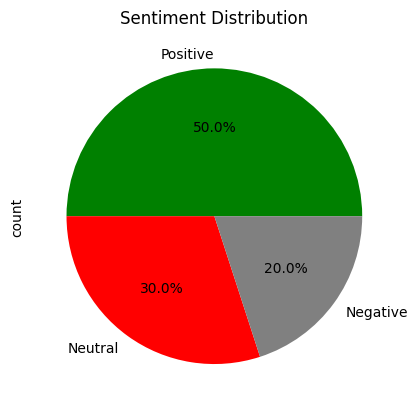

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/twitter__data.csv")

# Sentiment categorization
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['vader_compound'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['vader_compound'].apply(lambda x: 'Positive' if x>0.05 else 'Negative' if x<-0.05 else 'Neutral')

# Pie chart
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['green','red','grey'])
plt.title("Sentiment Distribution")
plt.show()


## **Word Cloud for Trending Keywords**

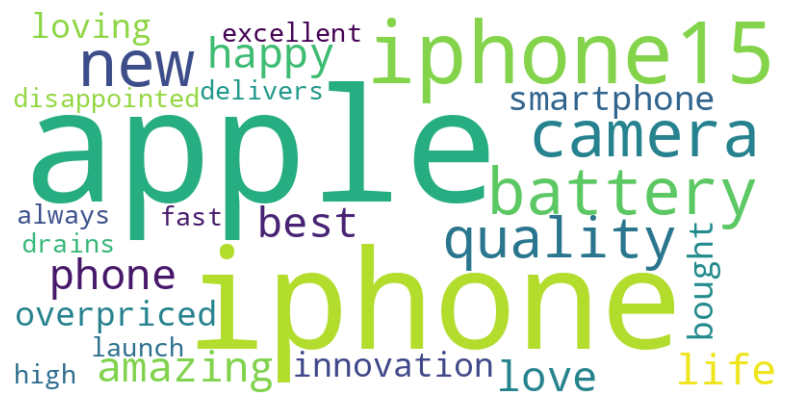

In [20]:
from wordcloud import WordCloud

# Simple cleaning
df['clean_text'] = df['text'].str.lower().str.replace(r"(?:\@|https?\://)\S+", "", regex=True)
df['clean_text'] = df['clean_text'].str.replace(r"[^\w\s]", "", regex=True)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['clean_text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Engagement Metrics**

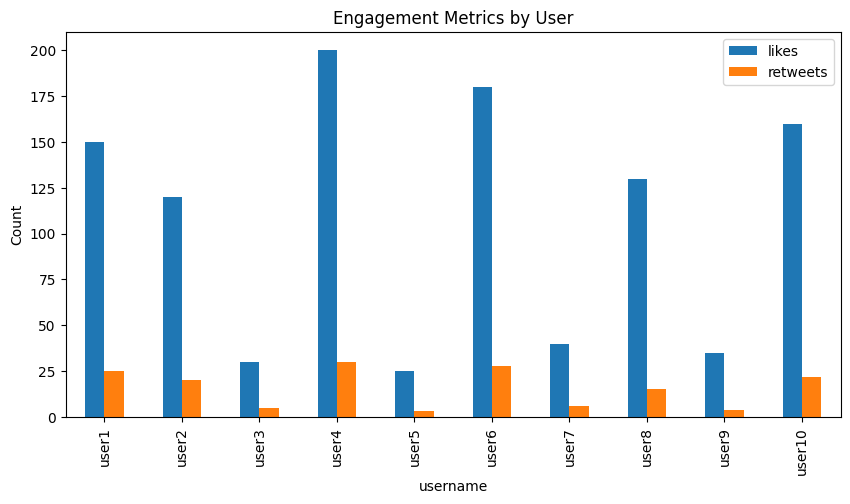

In [21]:
# Plot likes and retweets
df[['username','likes','retweets']].set_index('username').plot(kind='bar', figsize=(10,5))
plt.title("Engagement Metrics by User")
plt.ylabel("Count")
plt.show()

## **Time-Series Analysis**

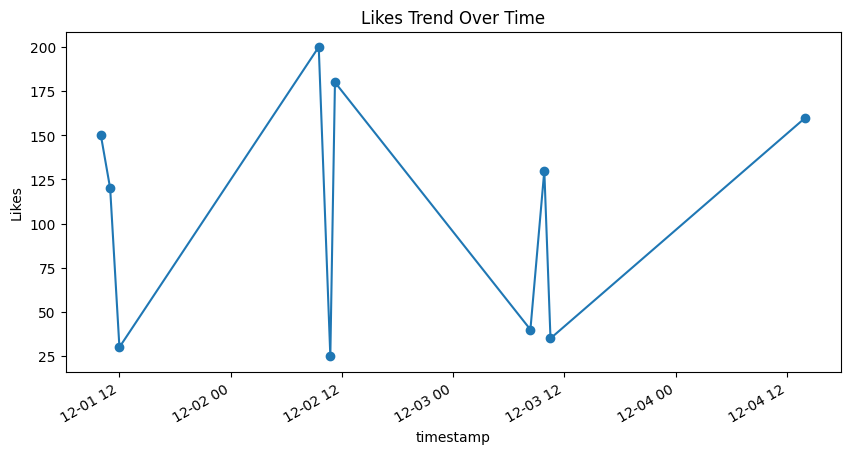

In [22]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp')['likes'].plot(figsize=(10,5), marker='o')
plt.title("Likes Trend Over Time")
plt.ylabel("Likes")
plt.show()


## **Dashboard**

Text(value='', description='Keyword:')

DatePicker(value=datetime.date(2025, 12, 1), description='Start Date')

DatePicker(value=datetime.date(2025, 12, 4), description='End Date')

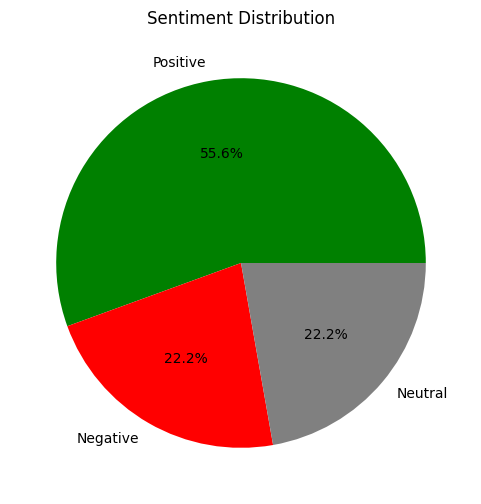

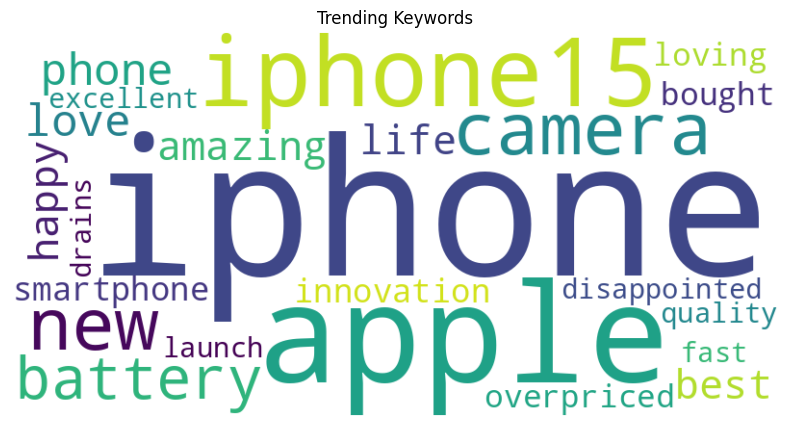

<Figure size 1000x500 with 0 Axes>

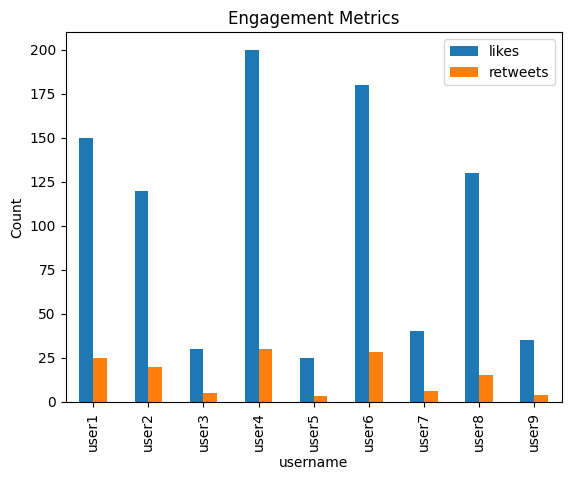

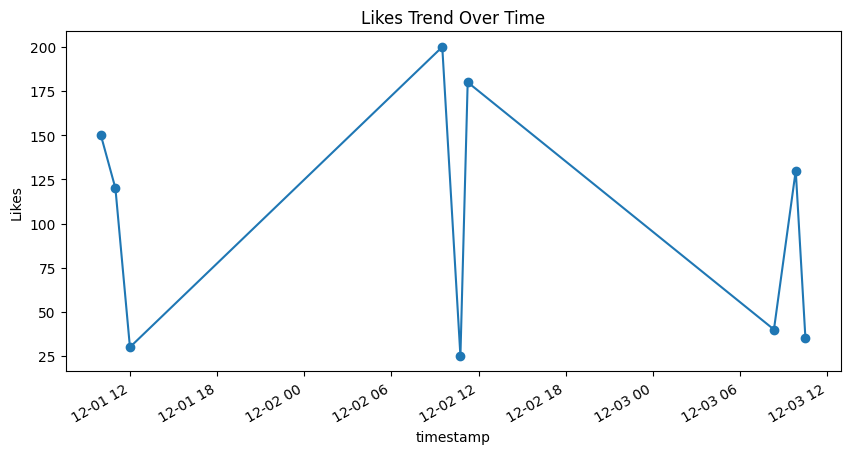

In [23]:
# Install necessary packages
!pip install wordcloud nltk --quiet

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import ipywidgets as widgets
from IPython.display import display

# Load CSV
df = pd.read_csv("/content/twitter__data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['vader_compound'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['vader_compound'].apply(lambda x: 'Positive' if x>0.05 else 'Negative' if x<-0.05 else 'Neutral')

# Interactive widgets
keyword_input = widgets.Text(description="Keyword:")
start_date_input = widgets.DatePicker(description="Start Date", value=df['timestamp'].min().date())
end_date_input = widgets.DatePicker(description="End Date", value=df['timestamp'].max().date())
display(keyword_input, start_date_input, end_date_input)

def update_dashboard(change):
    keyword = keyword_input.value.lower()
    start_date = pd.to_datetime(start_date_input.value)
    end_date = pd.to_datetime(end_date_input.value)

    filtered_df = df[df['text'].str.contains(keyword, case=False)] if keyword else df.copy()
    filtered_df = filtered_df[(filtered_df['timestamp'] >= start_date) & (filtered_df['timestamp'] <= end_date)]

    # Sentiment Pie Chart
    plt.figure(figsize=(6,6))
    filtered_df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green','red','grey'])
    plt.title("Sentiment Distribution")
    plt.ylabel('')
    plt.show()

    # Word Cloud
    plt.figure(figsize=(10,5))
    text = " ".join(filtered_df['text']).lower()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Trending Keywords")
    plt.show()

    # Engagement Bar Chart
    plt.figure(figsize=(10,5))
    filtered_df[['username','likes','retweets']].set_index('username').plot(kind='bar')
    plt.ylabel("Count")
    plt.title("Engagement Metrics")
    plt.show()

    # Time-Series Likes Trend
    plt.figure(figsize=(10,5))
    filtered_df.set_index('timestamp')['likes'].plot(marker='o')
    plt.ylabel("Likes")
    plt.title("Likes Trend Over Time")
    plt.show()

# Attach update function to widget changes
keyword_input.observe(update_dashboard, names='value')
start_date_input.observe(update_dashboard, names='value')
end_date_input.observe(update_dashboard, names='value')

# Initial dashboard display
update_dashboard(None)


## **Data Collection (Tweepy API Example)**

In [14]:
!pip install tweepy pandas

